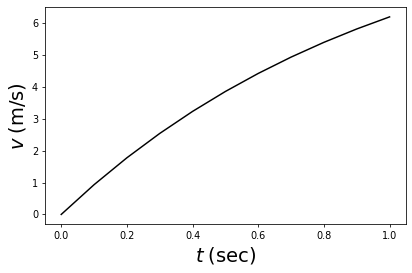

In [36]:
import numpy as np
import matplotlib.pyplot as plt
m = 1.0 #g
g = 9.8 #m/s^2
v_0 = 0. #m/s
beta = 1.0 #1/s
Nt = 10
t_arr = np.linspace(0,1.,Nt+1)

v_arr = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)


fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_arr,'-k',label = 'Analytic Solution')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()

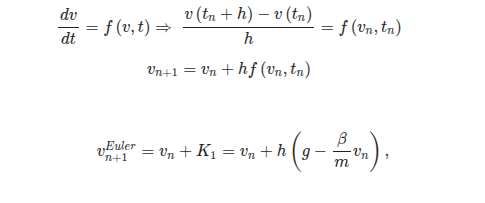

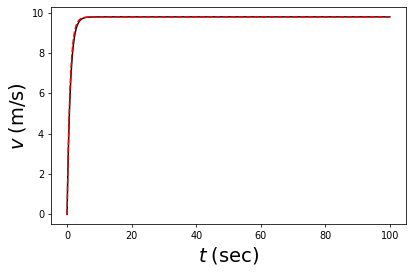

In [13]:
import numpy as np
import matplotlib.pyplot as plt
m = 1.0 #g
g = 9.8 #m/s^2
v_0 = 0. #m/s
beta = 1.0 #1/s
Nt = 500 # intervals
t_max = 100. # seconds
t_arr = np.linspace(0,t_max,Nt+1)
v_analytic = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)

#-==
v_arr = np.zeros(Nt+1)
h = t_max / Nt

#v_n+1 = v_n  + h * (g - beta/m * v_n)
for n in range(Nt):
    v_arr[n+1] = v_arr[n] + h * (g - beta/m * v_arr[n])

#print (v_arr)

fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_analytic,'-k',label = 'Analytic Solution')
plt.plot(t_arr, v_arr,'--r',label = 'Euler Solution')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()

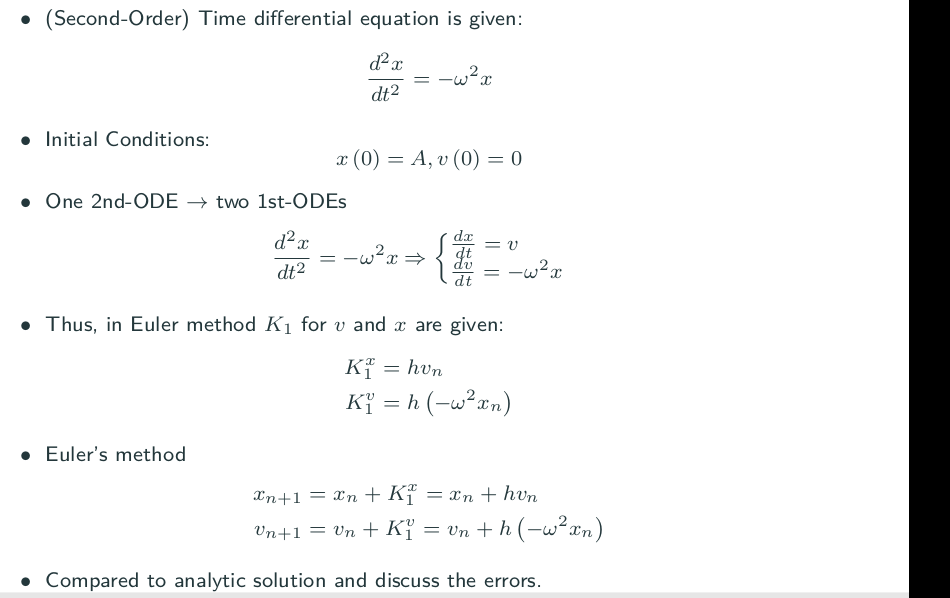


Text(0, 0.5, '$x\\;(\\rm m)$')

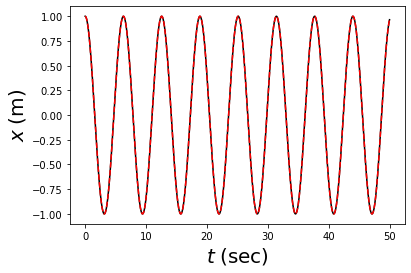

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Nt = 5000*5 # intervals
t_max = 10. *5 # seconds
h = t_max / Nt 
t_arr = np.linspace(0,t_max,Nt+1)
x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)

omega = 1. # 
x_arr[0] = 1. # cm

for n in range(Nt):
    x_arr[n+1] = x_arr[n] + h * v_arr[n] - omega**2. * x_arr[n]* h**2./2

    v_arr[n+1] = v_arr[n] + h * (- omega**2. * x_arr[n]) - omega**2. * v_arr[n] * h**2./2

x_analytic = 1.0 * np.cos(omega * t_arr)

plt.plot(t_arr, x_analytic, '-k',label = 'Analtyic Solution') 
plt.plot(t_arr, x_arr, '--r',label = 'Numerical Solution') 
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$x\;(\rm m)$', fontsize = 20)

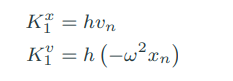

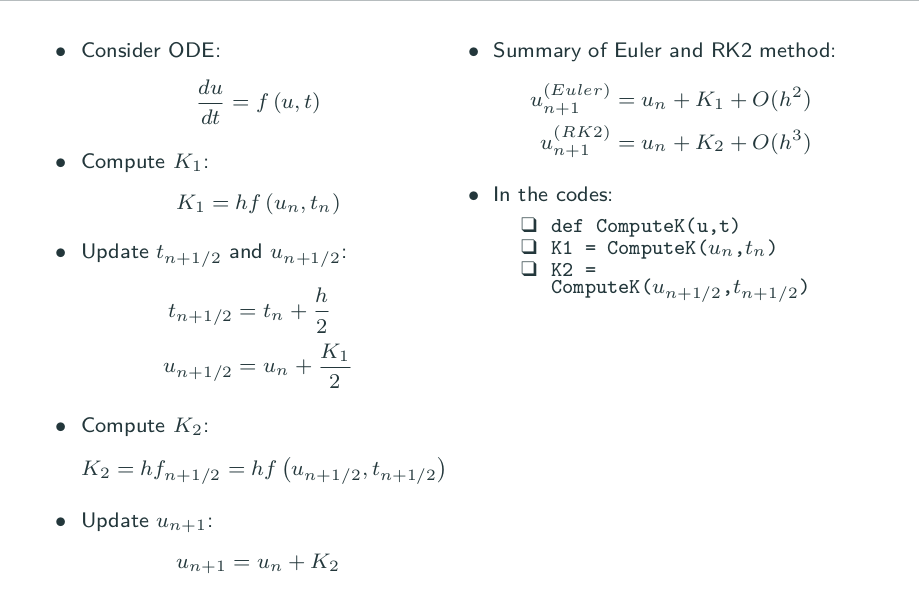

Text(0, 0.5, '$x\\;(\\rm m)$')

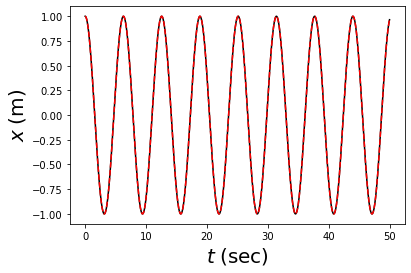

In [8]:

def ComputeK(x,v,h):
    fx = v
    fv = -omega**2. * x
    K_x = h * fx # for x-part
    K_v = h * fv # for v-part
    return [K_x, K_v]


#===

import numpy as np
import matplotlib.pyplot as plt
Nt = 5000*5 # intervals
t_max = 10. *5 # seconds
h = t_max / Nt 
t_arr = np.linspace(0,t_max,Nt+1)
x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)

omega = 1. # 
x_arr[0] = 1. # cm

for n in range(Nt):
    #x_arr[n+1] = x_arr[n] + h * v_arr[n] - omega**2. * x_arr[n]* h**2./2
    #v_arr[n+1] = v_arr[n] + h * (- omega**2. * x_arr[n]) - omega**2. * v_arr[n] * h**2./2
    # how to calculate x_mid, v_mid
    [K1_x, K1_v] = ComputeK(x_arr[n],v_arr[n],h)
    x_mid = x_arr[n] + K1_x/2.
    v_mid = v_arr[n] + K1_v/2.
    #how to calculate K2_x, K2_v
    [K2_x, K2_v] = ComputeK(x_mid,v_mid,h) 
    x_arr[n+1] = x_arr[n] + K2_x
    v_arr[n+1] = v_arr[n] + K2_v

x_analytic = 1.0 * np.cos(omega * t_arr)

plt.plot(t_arr, x_analytic, '-k',label = 'Analtyic Solution') 
plt.plot(t_arr, x_arr, '--r',label = 'Numerical Solution') 
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$x\;(\rm m)$', fontsize = 20)




In [ ]:


def ComputeK1(x,v,t):
    fx = v
    fv = -omega**2. * x
    K1_x = h * fx # for x-part
    K1_v = h * fv # for v-part
    return [K1_x, K1_v]

    
def ComputeK2(x_mid,v_mid,t_mid):
    fx = v_mid
    fv = -omega**2. * x_mid
    K2_x = h * fx # for x-part
    K2_v = h * fv # for v-part
    return [K2_x, K2_v]
    

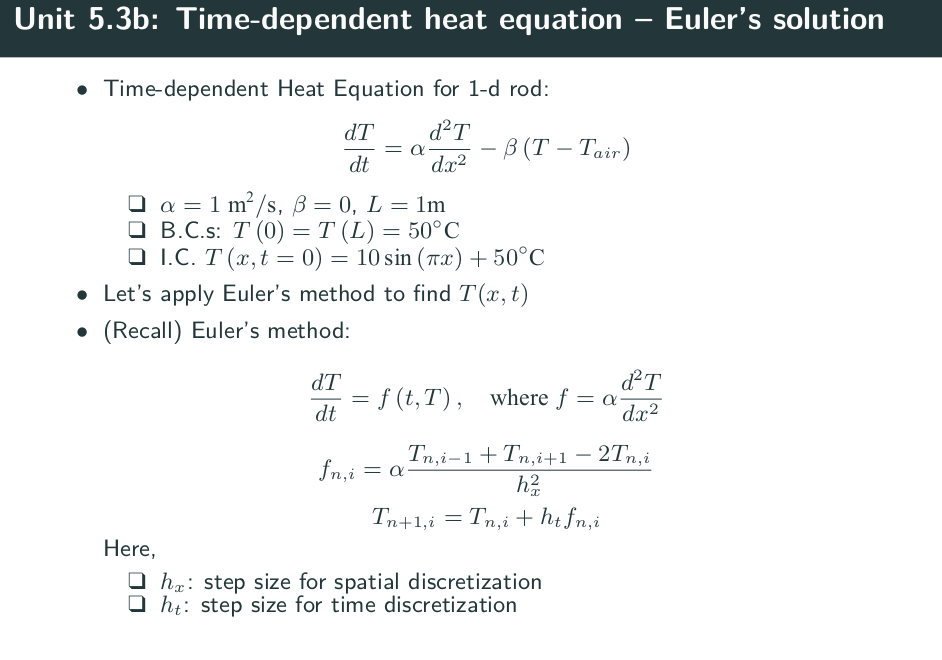